# Matemática para Ciencia de los Datos
# Quiz 2

María Auxiliadora Mora, 
Instituto Tecnológico de Costa Rica, 

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en jupyter ( .IPYNB ). 

Modo de trabajo: Individual.

---



Resumen En el presente quiz se repasan varios conceptos elementales respecto a auto-valores, auto-vectores y PCA.


---


**Pregunta 1. Auto-valores y auto-vectores**

Dada la siguiente matriz:

\begin{equation}
A= \begin{bmatrix}
   0. &  1. \\
   -2. & -3.
\end{bmatrix}
\end{equation}

**Parte 1.a (5 puntos)**

En una celda de markdown, calcule los auto-valores y auto-vectores como los ejemplos vistos en clase. Debe presentar todo el procedimiento matemático.  Puede usar alguna calculadora de ecuaciones o la función roots de numpy para corroborar sus resultados.
 
**Parte 2.a (20 puntos)**

En una celda de código y utilizando la función eig de numpy calcule los auto-valores y auto-vectores de A y haga las operaciones en el código para mostrar que se cumple: $A\,\vec{x} = \lambda\vec{x}$ (No olvide que pueden haber pequeñas diferencias por precisión de la representación numérica).

**Respuesta 1-1a**

Para la siguiente matriz queremos determinar sus auto valores y auto vectores:

$
A= \begin{bmatrix}
0 & 1\\
-2 & -3
\end{bmatrix}
$

Por lo tanto, debemos encontrar tanto los vectores $\vec{x}$ como los valores $\lambda$ dados por:

$
\begin{bmatrix}
0 & 1\\
-2 & -3
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}=
\lambda
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
$

Se debe cumplir que $\textrm{det}\left(\left(A- \lambda I \right )\right)=0$

$
\begin{bmatrix}
-\lambda & 1\\
-2 & -3-\lambda
\end{bmatrix} = \lambda^2 + 3\lambda + 2 = 0
$

Para esta matriz tenemos $\lambda_1=-2, \lambda_2=-1$. A partir de este resultado podemos también proponer los auto vectores que hacen cumplir la igualdad.

**Se calculan el auto vector para cada auto valor ($\lambda$)**

Para $\lambda = -2$:

$
\begin{equation}
(A-\lambda \textrm{I}) \vec{x} = \begin{bmatrix}2 & 1\\ -2 & -1\end{bmatrix}\vec{x}= 0
\end{equation}
$

$
\begin{array}{c}
2x_{1}+x_{2}=0\\
-2x_{1}-x_{2}=0
\end{array}
$
Entonces => x=(1,-2)

Comprobamos la igualdad:
$
\begin{bmatrix}
0 & 1\\
-2 & -3
\end{bmatrix}
\begin{bmatrix}
1\\
-2
\end{bmatrix}=
-2
\begin{bmatrix}
1\\
-2
\end{bmatrix}
$


y para $\lambda = -1$:

$
\begin{equation}
(A-\lambda \textrm{I}) \vec{x} = \begin{bmatrix}1 & 1\\ -2 & -2\end{bmatrix}\vec{x}= 0
\end{equation}
$
Entonces => x=(1,-1)

$
\begin{bmatrix}
0 & 1\\
-2 & -3
\end{bmatrix}
\begin{bmatrix}
1\\
-1
\end{bmatrix}=
-1
\begin{bmatrix}
1\\
-1
\end{bmatrix}
$

Y los auto-vectores son:

$
\begin{bmatrix}
1\\
-2
\end{bmatrix}
y 
\begin{bmatrix}
1\\
-1
\end{bmatrix}
$


In [ ]:
#1-2.a
#utilizando la función eig de numpy calcule los auto-valores y auto-vectores de A y 
#haga las operaciones en el código para mostrar que se cumple:  𝐴𝑥⃗=𝜆𝑥
import numpy as np
from numpy import linalg as LA


def calcule(A):
    # Calcula los autovalores y autovectores de una matriz 
    # cuadrada usando la librería linalg de numpy.
    # :param A la matriz para el cálculo
    
    print("===================================================")
    print("A:")
    print(A)
    l, x = LA.eig(A)
    print("l-autovalores: ")
    print(l)
    print("x-autovectores: (Note que vienen normalizados)")
    print(x)
    # Prueba
    print("Prueba de resultados")
    
    print("A*x:")
    print(np.matmul(A,x))
    print("l*x: ")
    # en x los auto-vectores son columnas, por eso para multiplicarlos por los
    # auto-valores respectivos se ejecuta este código y se genera una matriz ya
    # multiplicado cada auto-valor por su respectivo auto-vector
    result = []
    for i in range(len(l)):
        columna = l[i]*x[:,i]
        result.append(columna)
    # se transpone porque resultado quedó con los vectores en forma de fila y 
    # se necesitan vectores columna (auto-vectores)
    result = np.array(result).transpose()
    print(result)    

    
# main

print("Ejemplo 1")
calcule(np.array([[0.0, 1.0],  [-2.0, -3.0]]) )

**Pregunta 2. Matriz de covarianza (15 puntos)**

Escriba una función, utilizando tensores de Pytorch, que calcule la matriz de covarianza de una matriz, sin usar estructuras de repetición (ej. for o while), usando únicamente las funciones para cálculo de vector medio, y multiplicaciones matriciales. Pruebe su uso con el Iris flower dataset.

In [ ]:
#Respuesta 2: Matriz de covarianza
import torch
import pandas as pd
import sklearn.datasets

# determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

# convert a df to tensor to be used in pytorch
def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values).float().to(device)

def covariance_matrix(A):
    A -= A.mean(axis=0) 
    fact = A.shape[0] - 1 
    return torch.mm(A.T, A.conj()) / fact
    

# carga el dataset
iris = sklearn.datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

#Convert dataframe to tensor
cov = covariance_matrix(df_to_tensor(X))
print("Matriz de Covarianza:")
print(cov)

**Pregunta 3. Aplique el método de PCA al siguiente conjunto de datos**

Para realizar el PCA se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset.  

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. La edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscopio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones se desea crear un modelo para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características pero antes se debe aplicar PCA a los datos para disminuir la dimensionalidad. **El presente ejercicio consiste únicamente en aplicar PCA a los datos**:

**Parte 3.a (20 puntos)**

Cargue el archivo, muestre el contenido del conjunto de datos de manera que se tenga claro qué atributos tiene y el tipo de dato de cada uno. Luego escale los atributos y muestre los datos luego de este proceso.

Para visualizar mejor los resultados se debe crear rangos sobre la columna Rings. Por ejemplo, los rangos podrían definirse de la siguiente forma, de 1 a 10 anillos el especímen es joven, de 11 a 20 anillos es un adulto-joven y más de esa cantidad de anillos es un adulto. Cree una nueva columna con esos resultados y utilice esta nueva columna como target.

**Parte 3.b (20 puntos)**

Aplíquele la técnica de PCA. Grafique la varianza explicada y los componentes principales (como el ejemplo visto en clase).


**Parte 3.c (20 puntos)**

A partir del resultado en (3.b), seleccione los dos primeros componentes, proyecte el conjunto de datos en estos dos componentes y visualice los valores proyectados en esos dos componentes principales.




In [3]:
#3a. Cargue el archivo
# Bibliotecas a utilizar
###############################################################################
import torch 
import math 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import re
import cv2
import torch.nn as nn
# Gráficas estadísticas
import seaborn as sns

In [4]:
#Cargue los datos utilizando un dataframe de Pandas.
df = pd.read_csv('datos/Abalone.csv')
df.head()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,0.745,0.585,0.215,2.4990,0.4720,0.700,17
1,0.740,0.600,0.195,1.9740,0.4085,0.710,16
2,0.735,0.590,0.225,1.7560,0.3405,0.580,21
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17
4,0.725,0.560,0.210,2.1410,0.3980,1.005,18


In [5]:
df.dtypes

Length         float64
Diameter       float64
Height         float64
Whole          float64
Viscera        float64
Shellweight    float64
Rings            int64
dtype: object

In [6]:
# Selección de las columnas a utilizar
features=['Length', 'Diameter', 'Height', 'Whole', 'Viscera', 'Shellweight' ]
x_features = df[features]

print(x_features)

#Convertir a tensor de Pytorch
print(x_features.columns)
A=torch.tensor(x_features.values)

# Escalar los datos 
A_zscaled = np.array( A )
scaler = MinMaxScaler()     #de la biblioteca Scikit-learn
scaler.fit(A_zscaled) 
A_zscaled = scaler.transform(A_zscaled)

#image as a tensor
#A = torch.from_numpy(A_zscaled)
print("Atributos escalados:")
print(A_zscaled)

#Aplíquele la técnica de PCA. Grafique la varianza explicada y los componentes principales
df_zscaled  = pd.DataFrame (A_zscaled)

     Length  Diameter  Height   Whole  Viscera  Shellweight
0     0.745     0.585   0.215  2.4990   0.4720       0.7000
1     0.740     0.600   0.195  1.9740   0.4085       0.7100
2     0.735     0.590   0.225  1.7560   0.3405       0.5800
3     0.730     0.595   0.230  2.8255   0.4190       0.8970
4     0.725     0.560   0.210  2.1410   0.3980       1.0050
..      ...       ...     ...     ...      ...          ...
982   0.155     0.105   0.050  0.0175   0.0035       0.0050
983   0.150     0.100   0.025  0.0150   0.0040       0.0050
984   0.130     0.100   0.030  0.0130   0.0030       0.0040
985   0.110     0.090   0.030  0.0080   0.0020       0.0030
986   0.075     0.055   0.010  0.0020   0.0005       0.0015

[987 rows x 6 columns]
Index(['Length', 'Diameter', 'Height', 'Whole', 'Viscera', 'Shellweight'], dtype='object')
Atributos escalados:
[[1.         0.97247706 0.89130435 0.88436338 0.87234043 0.69606378]
 [0.99253731 1.         0.80434783 0.69842394 0.75485661 0.7060289 ]
 [0.98

In [7]:
#create the ranges
df['Rings_Range'] = df['Rings'].apply(lambda x: 'joven' if x <= 10 else ('adulto-joven' if x <= 20 else 'adulto'))
print (df.head())

y_targets = df['Rings_Range']
print(y_targets)

   Length  Diameter  Height   Whole  Viscera  Shellweight  Rings   Rings_Range
0   0.745     0.585   0.215  2.4990   0.4720        0.700     17  adulto-joven
1   0.740     0.600   0.195  1.9740   0.4085        0.710     16  adulto-joven
2   0.735     0.590   0.225  1.7560   0.3405        0.580     21        adulto
3   0.730     0.595   0.230  2.8255   0.4190        0.897     17  adulto-joven
4   0.725     0.560   0.210  2.1410   0.3980        1.005     18  adulto-joven
0      adulto-joven
1      adulto-joven
2            adulto
3      adulto-joven
4      adulto-joven
           ...     
982           joven
983           joven
984           joven
985           joven
986           joven
Name: Rings_Range, Length: 987, dtype: object


In [8]:
#3b. Aplíquele la técnica de PCA. Grafique la varianza explicada y los componentes principales

# calcula los auto-valores y auto-vectores
eigenvalues, eigenvectors = np.linalg.eig(df_zscaled.cov())

#Se normalizan
eigenvalues_normalized = eigenvalues / eigenvalues.sum()

#Se calcula la varianza acumulada
# Devuelve la suma acumulativa de los elementos a lo largo de un eje dado. 
cumvar_explained = np.cumsum(eigenvalues_normalized)

print("Auto-valores:")
print(eigenvalues)

print("Auto-vectores:")
print( eigenvectors)

print("Auto-valores normalizados:")
print(eigenvalues_normalized)

print("Varianza explicada acumulada:")
print( cumvar_explained )


Auto-valores:
[0.16294455 0.00556356 0.00363446 0.00256621 0.00033938 0.00047504]
Auto-vectores:
[[-0.43534253  0.29258176 -0.45935647  0.07805415  0.69471095  0.15858333]
 [-0.4536138   0.30520937 -0.43914815  0.12161491 -0.69712618 -0.0863456 ]
 [-0.39613115  0.54637367  0.70398363 -0.21645416  0.02081142 -0.04095671]
 [-0.38838145 -0.39935366  0.08908067  0.15745813  0.14793295 -0.79690898]
 [-0.42877665 -0.50507895 -0.03701632 -0.67655807 -0.07526878  0.31028924]
 [-0.33630633 -0.3288326   0.30206292  0.67062738 -0.05838766  0.48412289]]
Auto-valores normalizados:
[0.92833628 0.03169699 0.02070641 0.01462037 0.00193351 0.00270644]
Varianza explicada acumulada:
[0.92833628 0.96003327 0.98073968 0.99536004 0.99729356 1.        ]


In [9]:
# Se proyecta los datos en el espacio generado por los autovectores.
T = pd.DataFrame(df_zscaled.dot(eigenvectors))

# Nombres de columnas
T.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']

# agrega la etiqueta de las especies
T = pd.concat([T, y_targets], axis=1)

print("Parte de las muestras proyectadas")
print(T)

Parte de las muestras proyectadas
          pc1       pc2       pc3       pc4       pc5       pc6   Rings_Range
0   -2.181145  0.053713 -0.002210  0.019256  0.059846 -0.058990  adulto-joven
1   -2.036697  0.142737 -0.081290  0.097733  0.014419  0.057559  adulto-joven
2   -1.949296  0.343196 -0.019332  0.052768  0.030352  0.012393        adulto
3   -2.274444  0.027189  0.119157  0.221826  0.045884 -0.094334  adulto-joven
4   -2.132998  0.038943  0.101923  0.292544  0.044436  0.146831  adulto-joven
..        ...       ...       ...       ...       ...       ...           ...
982 -0.168174  0.151815  0.028632 -0.017719  0.022804  0.002927         joven
983 -0.117759  0.087329 -0.040544  0.003345  0.021553  0.007980         joven
984 -0.111972  0.092018 -0.011824 -0.003218  0.001360  0.001864         joven
985 -0.088837  0.079654  0.009556 -0.007475 -0.006651 -0.000931         joven
986  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000         joven

[987 rows x 7 columns]


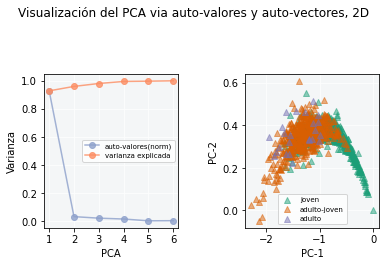

In [15]:
#########################################
# Primer gráfico
#########################################
# Separa por la etiqueta 
rings = [T[T.Rings_Range=='joven'], 
          T[T.Rings_Range=='adulto-joven'], 
          T[T.Rings_Range=='adulto']]

rings_names = ['joven','adulto-joven','adulto']

# define un color por especie
colors = ['#1b9e77', '#d95f02', '#7570b3']

_, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

# Gráfica que muestra los autovalores normalizados y acumulados 
ax1.plot([1,2,3,4,5,6],
         eigenvalues_normalized,
         '-o',
         color='#8da0cb',
         label='auto-valores(norm)',
         alpha=0.8,
         zorder=1000)

ax1.plot([1,2,3,4,5,6],
         cumvar_explained,
         '-o',
         color='#fc8d62',
         label='varianza explicada',
         alpha=0.8,
         zorder=1000)

ax1.set_xlim(0.8, 6.2)
ax1.set_xticks([1,2,3,4,5,6])
ax1.set_xlabel('PCA')
ax1.set_ylabel('Varianza')
ax1.legend(loc='center right', fontsize=7)
ax1.grid(color='#fdfefe')
ax1.set_facecolor('#f4f6f7')

#3c

#########################################
# Segundo gráfico
#########################################
# Usa solo dos autovectores para visualizar los datos, pc1 y pc2
for group, color in zip(rings, colors):
    ax2.scatter(group.pc1,
                group.pc2,
                marker='^',
                color=color,
                label=group.Rings_Range,
                alpha=0.5,
                zorder=1000)
ax2.set_xlabel(r'PC-1')
ax2.set_ylabel(r'PC-2')
ax2.grid(color='#fdfefe')
ax2.set_facecolor('#f4f6f7')
ax2.legend(labels=rings_names, fontsize=7)

plt.suptitle(r'Visualización del PCA via auto-valores y auto-vectores, 2D')
plt.tight_layout(pad=3.0)
plt.show() 

In [11]:

#seleccione los dos primeros componentes, proyecte el conjunto de datos en estos dos componentes y visualice los valores proyectados en esos dos componentes principales.
from sklearn.decomposition import PCA

# Instancia de la clase seleccionado dos componentes principales.
pca = PCA(n_components=2)

# Instancia aplicada a los datos
principalComponents = pca.fit_transform(df_zscaled)

#Formato
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#Varianza , alrededor del 96%
print(pca.explained_variance_ratio_)


[0.92833628 0.03169699]


In [12]:
# Se agrega la columna del target
finalDf = pd.concat([principalDf, df[['Rings_Range']]], axis = 1)

print("Componentes principales PC1 y PC2")
print(finalDf.head(5))

Componentes principales PC1 y PC2
   principal component 1  principal component 2   Rings_Range
0               1.133025               0.287861  adulto-joven
1               0.988576               0.198837  adulto-joven
2               0.901176              -0.001622        adulto
3               1.226324               0.314385  adulto-joven
4               1.084878               0.302631  adulto-joven


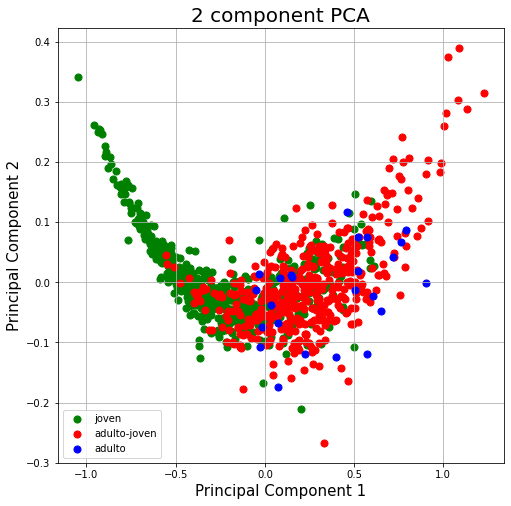

In [13]:
#Grafico 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['joven', 'adulto-joven', 'adulto']
colors = ['g', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rings_Range'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Parte 4. Puntos extra (5 puntos)**

Programe en python, utilizando tensores de Pytorch, una función recursiva (calcule_det) que reciba como parámetro una matriz cuadrada de cualquier tamaño y retorne su determinante. Usted debe programar las operaciones matemáticas necesarias, no utilizar una función tipo det para el cálculo. Pruebe su función con dos matrices que usted proponga.

Para que el ejercicio sea tomado en cuenta la función debe estar documentada perfectamente, es decir, debe incluir un encabezado y una explicación de los bloques de código importantes. 


In [55]:
#4. Calculate the determinant using recursion

import numpy as np
import torch

def submatrix(M, c):
    """ the submatrix Ai related to a(0,i) 
    Parameters: M: Matrix, c: column    
    Return: Return sub matrix deleting the row, column of the element
    """
    #create a container matrix
    B = [[1] * len(M) for i in range(len(M))]    

    #copy the matrix row,column
    for l in range(len(M)):
        for k in range(len(M)):
            B[l][k] = M[l][k]
            
    
    #pop the first row
    B.pop(0)
    #iterate until pop the i column
    for i in range(len(B)):
        B[i].pop(c)    
    return B


def det(matrix):
    
    """Returns a determinant of a matrix by recursive method.
    Parameters: M: Matrix n*n    
    Return: Return the determinant
    """
    X = 0
    #check if is square matrix
    (r,c) = np.shape(matrix) 
    if r != c:
        print("Error! Not a square matrix!")
        return None
    #the stop condition, the minimum calculation
    elif r==2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    #
    else:
        for i in range(len(matrix)): 
            #the value is accumulated in X for every iteration
            #the symbol is alternating between -, +, if it is even or odd
            #the value is multiply for the matrix without the row, column of i
            X = X + ((-1) ** (i)) * matrix[0][i] * det(submatrix(matrix, i))        
    return X




#test the function
np.random.seed(1)
matrix1=np.random.rand(3,3)
matrix2=np.random.rand(5,5)

A = torch.tensor(matrix1)
print(A)
print("Determinante A:",det(A))


B = torch.tensor(matrix2)
print(B)
print("Determinante B:",det(B))


tensor([[4.1702e-01, 7.2032e-01, 1.1437e-04],
        [3.0233e-01, 1.4676e-01, 9.2339e-02],
        [1.8626e-01, 3.4556e-01, 3.9677e-01]], dtype=torch.float64)
Determinante A: tensor(-0.0630, dtype=torch.float64)
tensor([[0.5388, 0.4192, 0.6852, 0.2045, 0.8781],
        [0.0274, 0.6705, 0.4173, 0.5587, 0.1404],
        [0.1981, 0.8007, 0.9683, 0.3134, 0.6923],
        [0.8764, 0.8946, 0.0850, 0.0391, 0.1698],
        [0.8781, 0.0983, 0.4211, 0.9579, 0.5332]], dtype=torch.float64)
Determinante B: tensor(0.1267, dtype=torch.float64)
